## Problem 2: Create buffers around shopping centers (7 points)

Let’s continue with our case study and calculate a 1.5 km buffer around the geocoded points. 

### a) Load the shopping centre data set (1 point)

First, load the shopping centre *point* data set you created in *problem 1* into a `GeoDataFrame` called `shopping_centres`.

In [14]:
# ADD YOUR OWN CODE HERE
import geopandas as gpd

import pathlib
DATA_DIRECTORY = pathlib.Path().resolve() / "data"

shopping_centres = gpd.read_file(DATA_DIRECTORY / "shopping_centres.gpkg", layer="shopping_centres")

shopping_centres

,address,id,name,addr,geometry
0,"CAP-Autokoulu, 1-7, Itäkatu, Itäkeskus, Vartio...",0,Itis,"Itäkatu 1-7, 00930 Helsinki, Finland",POINT (25504406.501 6677524.123)
1,"Change Lingerie, 14-20, Mannerheimintie, Kesku...",1,Forum,"Mannerheimintie 14–20, 00100 Helsinki, Finland",POINT (25496591.634 6672925.394)
2,"Iso Omena, 11, Piispansilta, Matinkylä, Suur-M...",2,Iso-omena,"Piispansilta 11, 02230 Espoo, Finland",POINT (25485470.435 6672070.967)
3,"Taco Bell, 3-9, Leppävaarankatu, Ruusutorppa, ...",3,Sello,"Leppävaarankatu 3-9, 02600 Espoo, Finland",POINT (25489646.329 6678453.64)
4,"Stockmann, 3, Vantaanportinkatu, Vantaanportti...",4,Jumbo,"Vantaanportinkatu 3, 01510 Vantaa, Finland",POINT (25497943.932 6686656.982)
5,"Valaskala, 5, Hermannin rantatie, Verkkosaari,...",5,REDI,"Hermannin rantatie 5, 00580 Helsinki, Finland",POINT (25498988.571 6674918.261)
6,"Mall of Tripla, 1, Fredikanterassi, Keski-Pasi...",6,Tripla,"Fredikanterassi 1, 00520 Helsinki, Finland",POINT (25496145.658 6676164.227)



---

### b) Create a *buffer* around the points (5 points)

Calculate a 1.5 km buffer for each geocoded point. Overwrite the `geometry` column with the new buffer geometry.

Use the [`geopandas.GeoDataFrame.buffer()` method](http://geopandas.org/geometric_manipulations.html#GeoSeries.buffer), that uses shapely’s [`buffer()`](http://toblerity.org/shapely/manual.html#object.buffer) in the background. You only need to care about the `distance` parameter, don’t worry about the possible other arguments.

In [15]:
# ADD YOUR OWN CODE HERE
shopping_centres["geometry"] = shopping_centres.buffer(distance=1500)

In [16]:
shopping_centres

,address,id,name,addr,geometry
0,"CAP-Autokoulu, 1-7, Itäkatu, Itäkeskus, Vartio...",0,Itis,"Itäkatu 1-7, 00930 Helsinki, Finland","POLYGON ((25505906.501 6677524.123, 25505899.2..."
1,"Change Lingerie, 14-20, Mannerheimintie, Kesku...",1,Forum,"Mannerheimintie 14–20, 00100 Helsinki, Finland","POLYGON ((25498091.634 6672925.394, 25498084.4..."
2,"Iso Omena, 11, Piispansilta, Matinkylä, Suur-M...",2,Iso-omena,"Piispansilta 11, 02230 Espoo, Finland","POLYGON ((25486970.435 6672070.967, 25486963.2..."
3,"Taco Bell, 3-9, Leppävaarankatu, Ruusutorppa, ...",3,Sello,"Leppävaarankatu 3-9, 02600 Espoo, Finland","POLYGON ((25491146.329 6678453.64, 25491139.10..."
4,"Stockmann, 3, Vantaanportinkatu, Vantaanportti...",4,Jumbo,"Vantaanportinkatu 3, 01510 Vantaa, Finland","POLYGON ((25499443.932 6686656.982, 25499436.7..."
5,"Valaskala, 5, Hermannin rantatie, Verkkosaari,...",5,REDI,"Hermannin rantatie 5, 00580 Helsinki, Finland","POLYGON ((25500488.571 6674918.261, 25500481.3..."
6,"Mall of Tripla, 1, Fredikanterassi, Keski-Pasi...",6,Tripla,"Fredikanterassi 1, 00520 Helsinki, Finland","POLYGON ((25497645.658 6676164.227, 25497638.4..."


In [17]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION
assert shopping_centres.geometry.geom_type.unique() == ["Polygon"]


---

### d) Save buffer geometry layer (1 point)

Save the data frame containing the buffer geometries into a new layer `buffers` inside the same *GeoPackage* `shopping_centres.gpkg`:

In [18]:
# ADD YOUR OWN CODE HERE
shopping_centres.to_file(DATA_DIRECTORY / "shopping_centres.gpkg", layer="buffers", driver="GPKG")

<Axes: >

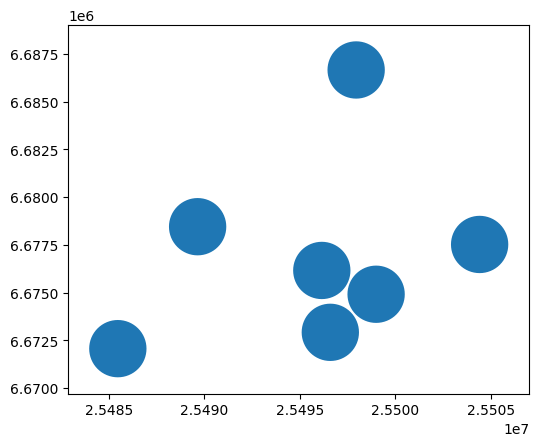

In [19]:
gpd.read_file(DATA_DIRECTORY / "shopping_centres.gpkg", layer="buffers").plot()

In [20]:
shopping_centres

,address,id,name,addr,geometry
0,"CAP-Autokoulu, 1-7, Itäkatu, Itäkeskus, Vartio...",0,Itis,"Itäkatu 1-7, 00930 Helsinki, Finland","POLYGON ((25505906.501 6677524.123, 25505899.2..."
1,"Change Lingerie, 14-20, Mannerheimintie, Kesku...",1,Forum,"Mannerheimintie 14–20, 00100 Helsinki, Finland","POLYGON ((25498091.634 6672925.394, 25498084.4..."
2,"Iso Omena, 11, Piispansilta, Matinkylä, Suur-M...",2,Iso-omena,"Piispansilta 11, 02230 Espoo, Finland","POLYGON ((25486970.435 6672070.967, 25486963.2..."
3,"Taco Bell, 3-9, Leppävaarankatu, Ruusutorppa, ...",3,Sello,"Leppävaarankatu 3-9, 02600 Espoo, Finland","POLYGON ((25491146.329 6678453.64, 25491139.10..."
4,"Stockmann, 3, Vantaanportinkatu, Vantaanportti...",4,Jumbo,"Vantaanportinkatu 3, 01510 Vantaa, Finland","POLYGON ((25499443.932 6686656.982, 25499436.7..."
5,"Valaskala, 5, Hermannin rantatie, Verkkosaari,...",5,REDI,"Hermannin rantatie 5, 00580 Helsinki, Finland","POLYGON ((25500488.571 6674918.261, 25500481.3..."
6,"Mall of Tripla, 1, Fredikanterassi, Keski-Pasi...",6,Tripla,"Fredikanterassi 1, 00520 Helsinki, Finland","POLYGON ((25497645.658 6676164.227, 25497638.4..."


In [21]:
gpd.read_file(DATA_DIRECTORY / "shopping_centres.gpkg", layer="buffers").head()

,address,id,name,addr,geometry
0,"CAP-Autokoulu, 1-7, Itäkatu, Itäkeskus, Vartio...",0,Itis,"Itäkatu 1-7, 00930 Helsinki, Finland","POLYGON ((25505906.501 6677524.123, 25505899.2..."
1,"Change Lingerie, 14-20, Mannerheimintie, Kesku...",1,Forum,"Mannerheimintie 14–20, 00100 Helsinki, Finland","POLYGON ((25498091.634 6672925.394, 25498084.4..."
2,"Iso Omena, 11, Piispansilta, Matinkylä, Suur-M...",2,Iso-omena,"Piispansilta 11, 02230 Espoo, Finland","POLYGON ((25486970.435 6672070.967, 25486963.2..."
3,"Taco Bell, 3-9, Leppävaarankatu, Ruusutorppa, ...",3,Sello,"Leppävaarankatu 3-9, 02600 Espoo, Finland","POLYGON ((25491146.329 6678453.64, 25491139.10..."
4,"Stockmann, 3, Vantaanportinkatu, Vantaanportti...",4,Jumbo,"Vantaanportinkatu 3, 01510 Vantaa, Finland","POLYGON ((25499443.932 6686656.982, 25499436.7..."
